In [1]:
from importlib import reload
import cupid_reader
reload(cupid_reader)
from cupid_reader import *

/home/anna/anaconda3/envs/conda3_env/lib/python3.6/site-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/anna/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
profiles = read_pickle('cleaned_profiles.p')[:]

#### Stem and remove punctuation (takes a while)

In [3]:
essay_objs = []
for i in range(0,10):
    essay_objs.append(essay(profiles, essay_num=i, frac_training=0.8))
    essay_objs[i].stem_and_remove_punctuation(stemmer=SnowballStemmer("english") )

Removed punctuation, tokenized, and stemmed responses for essay  0
Time Elapsed: 213.18s
Removed punctuation, tokenized, and stemmed responses for essay  1
Time Elapsed: 99.23s
Removed punctuation, tokenized, and stemmed responses for essay  2
Time Elapsed: 59.21s
Removed punctuation, tokenized, and stemmed responses for essay  3
Time Elapsed: 32.61s
Removed punctuation, tokenized, and stemmed responses for essay  4
Time Elapsed: 191.78s
Removed punctuation, tokenized, and stemmed responses for essay  5
Time Elapsed: 61.85s
Removed punctuation, tokenized, and stemmed responses for essay  6
Time Elapsed: 46.17s
Removed punctuation, tokenized, and stemmed responses for essay  7
Time Elapsed: 36.37s
Removed punctuation, tokenized, and stemmed responses for essay  8
Time Elapsed: 34.10s
Removed punctuation, tokenized, and stemmed responses for essay  9
Time Elapsed: 59.25s


#### Covert prediction text labels to numeric, then split prediction set (gender in this case) into training and test subsets

In [4]:
# create numeric ids, training/test subsets for the prediction column
gender_prediction = prediction(profiles, 'sex', frac_training=0.8)
religion_prediction = prediction(profiles, 'religion', frac_training=0.8)


In [5]:
#check matching numeric to text category labels
for i, id in enumerate(gender_prediction.id_pairs):
    print(id)

(1, 'm')
(0, 'f')


#### Split responses into training/test, convert to vector representation, apply TDFIF transform (weighting words according to frequency of appearance in each corpus and inverse frequency of # documents) and fit to training data and then apply transform to data

In [6]:
# split into training and test sets
for essay in essay_objs:
    essay.train_test_split(frac_training=0.8)
    essay.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=[0.005], maxDF=0.9)
    
# vectorize, transform, use logistic regression and find best min_DF value
# save model and y scores for best min_df

#essay0.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=np.linspace(5e-4, 5e-2, 10), maxDF=0.9)
#essay4.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=np.linspace(5e-4, 5e-2, 10), maxDF=0.6)

# fixing min_df for now--has big effect on top ranked features

#essay0.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=1, minDF_range=[0.005], maxDF=0.9)
#essay4.fit_with_bestMinDF(gender_prediction, 'gender', ngram_max=2, minDF_range=[0.005], maxDF=0.9)

Best min_df:  0.005
Time Elapsed: 51.39s
Best min_df:  0.005
Time Elapsed: 22.11s
Best min_df:  0.005
Time Elapsed: 13.65s
Best min_df:  0.005
Time Elapsed: 8.06s
Best min_df:  0.005
Time Elapsed: 63.73s
Best min_df:  0.005
Time Elapsed: 13.50s
Best min_df:  0.005
Time Elapsed: 12.57s
Best min_df:  0.005
Time Elapsed: 11.51s
Best min_df:  0.005
Time Elapsed: 7.90s
Best min_df:  0.005
Time Elapsed: 16.04s


In [7]:
wordsSets=[]

for essay in essay_objs:
    wordsSets.append(essay.get_top_features('gender', gender_prediction, Ntop_features=60, printOutput=False))


#### Plot ROC curve for the model

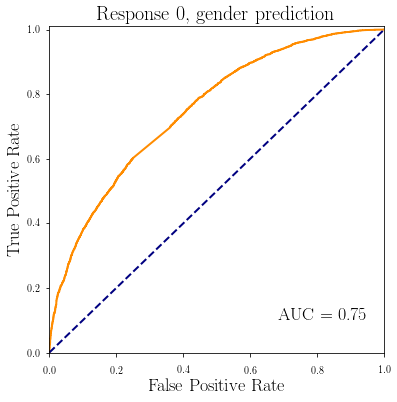

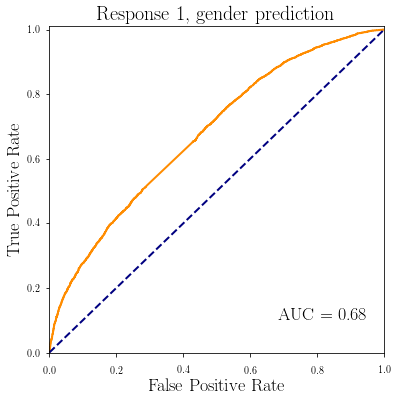

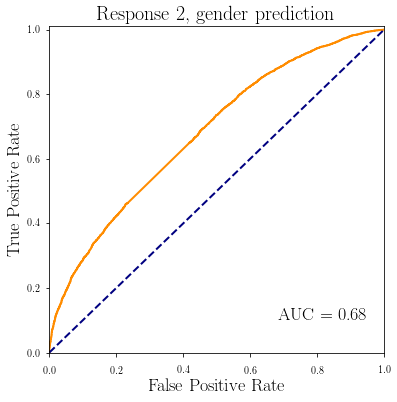

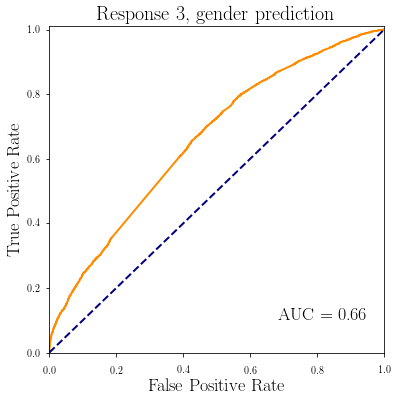

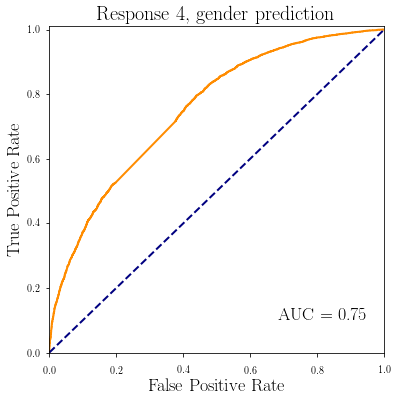

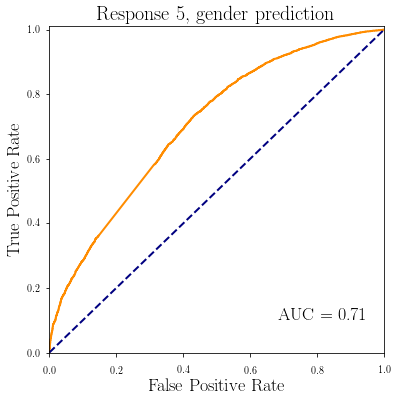

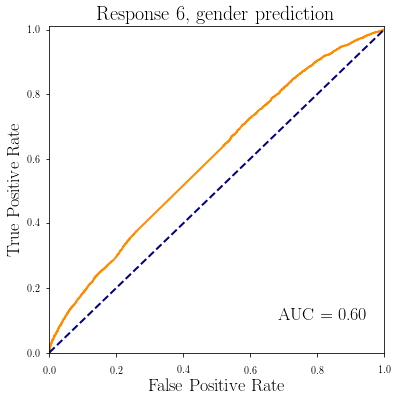

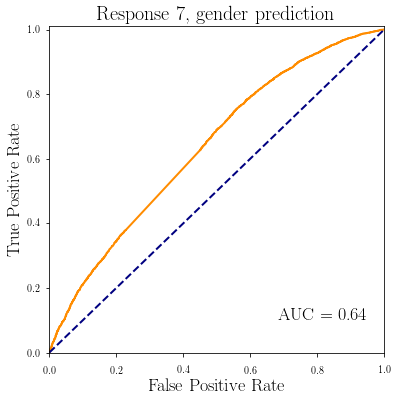

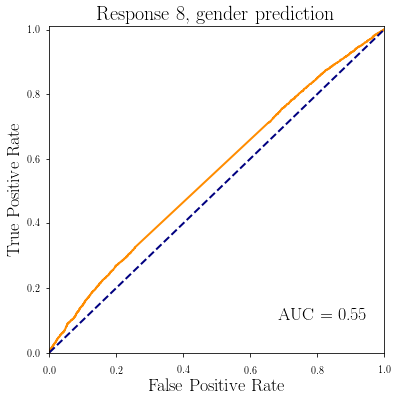

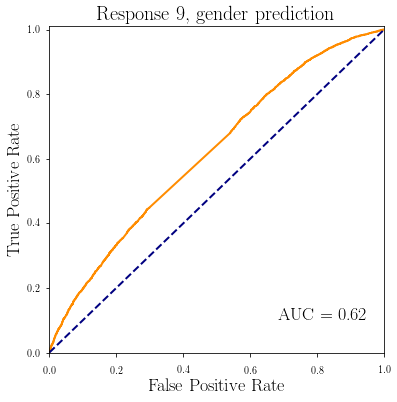

In [8]:
for essay in essay_objs:
    essay.plotROC('gender', gender_prediction)


#### Make word clouds 

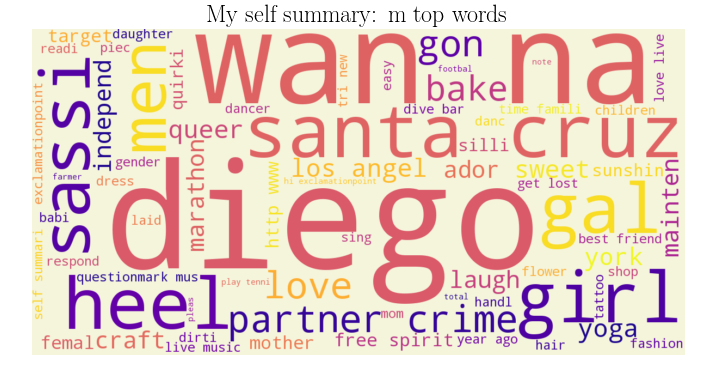

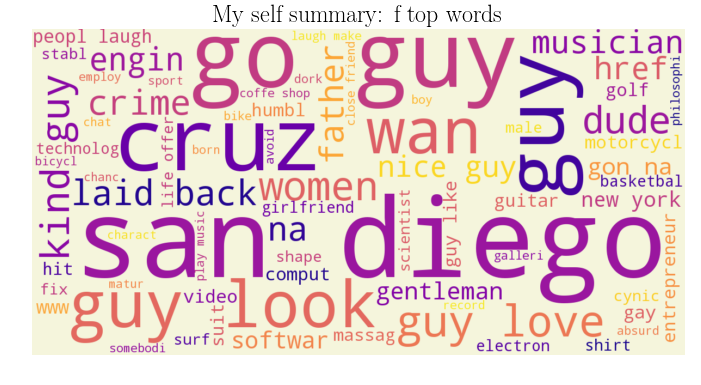

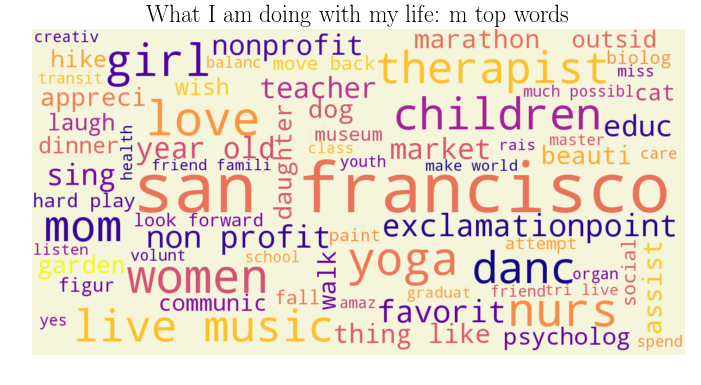

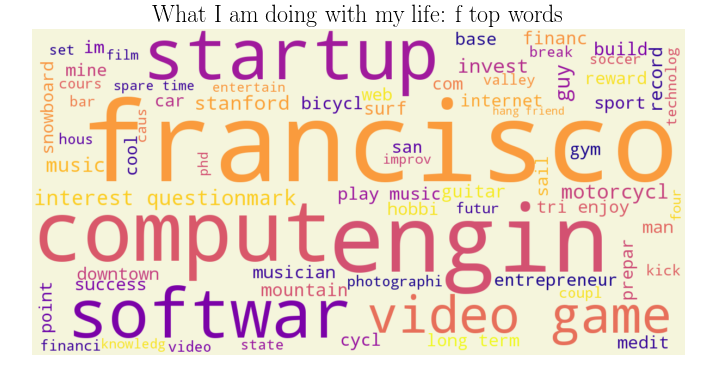

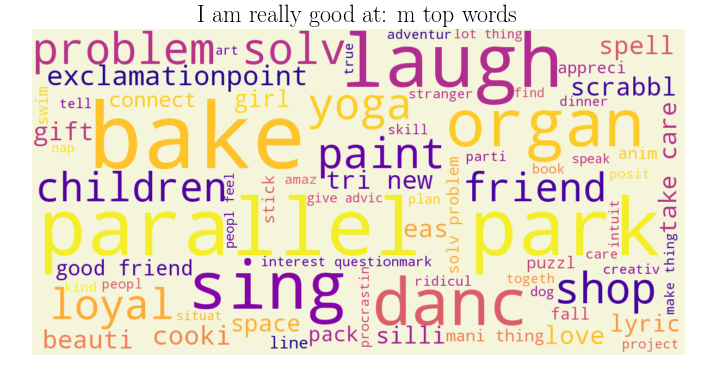

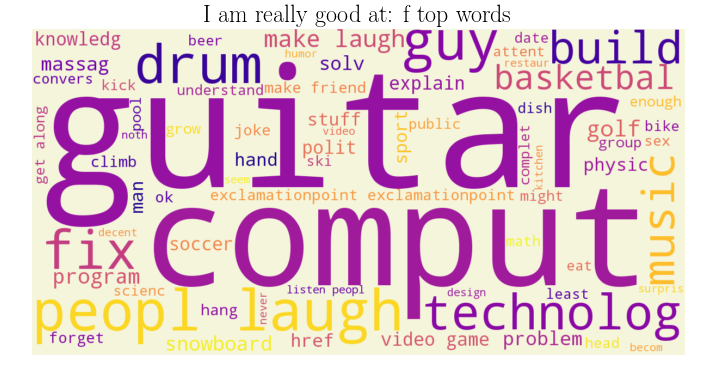

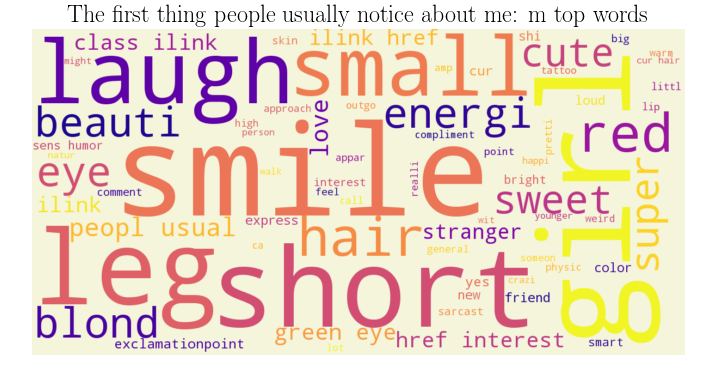

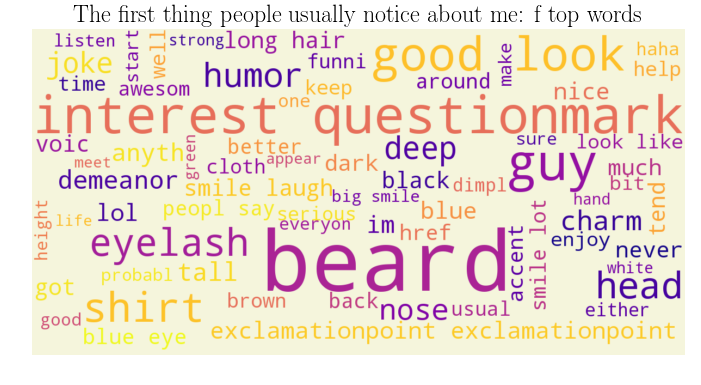

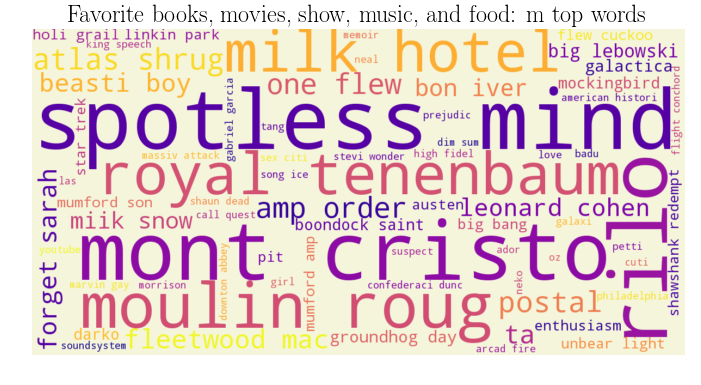

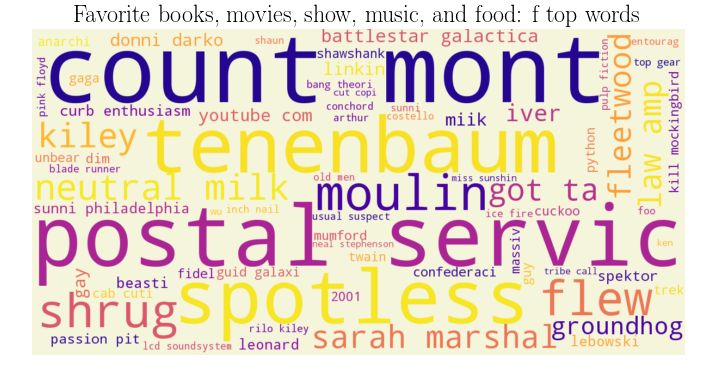

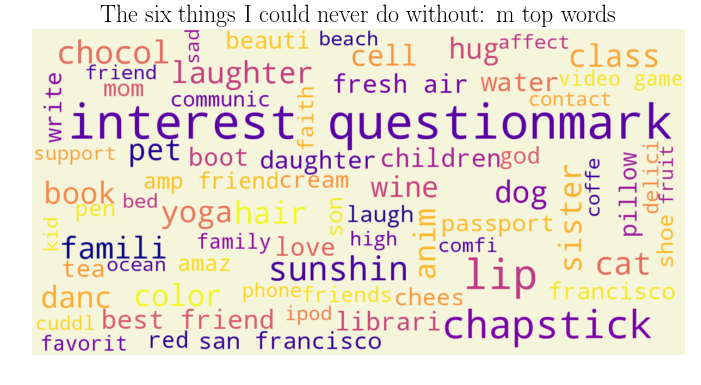

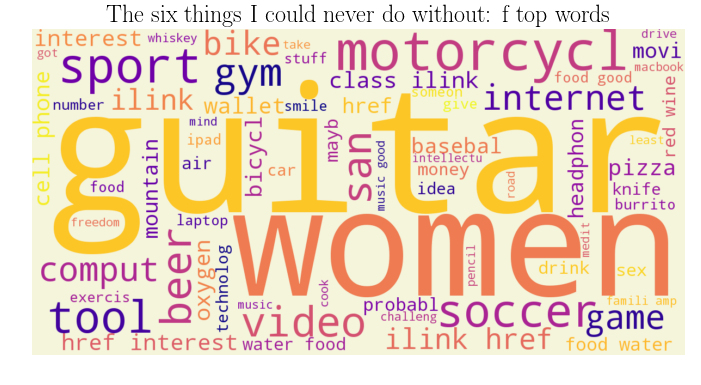

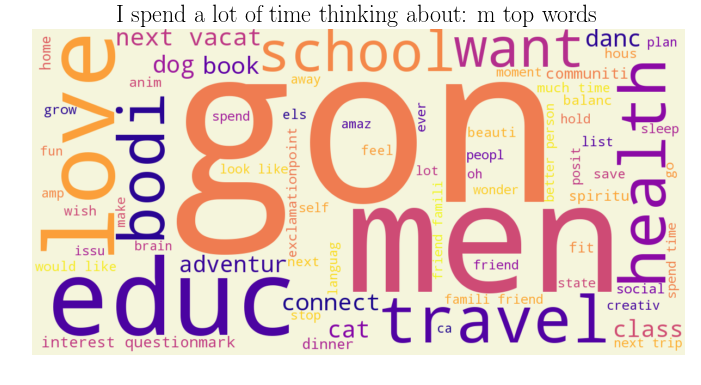

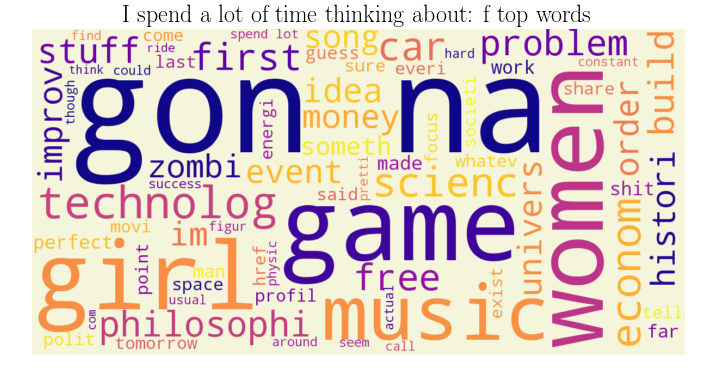

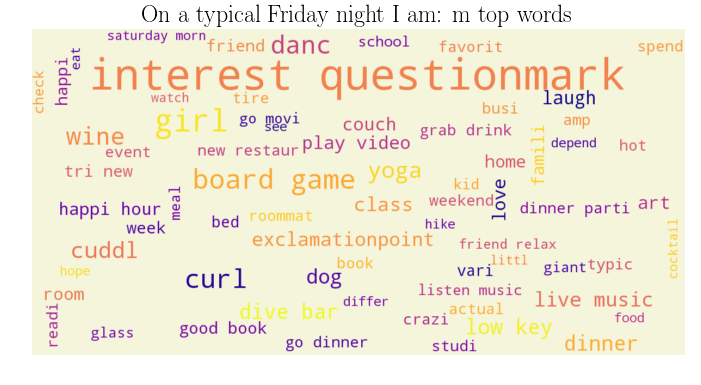

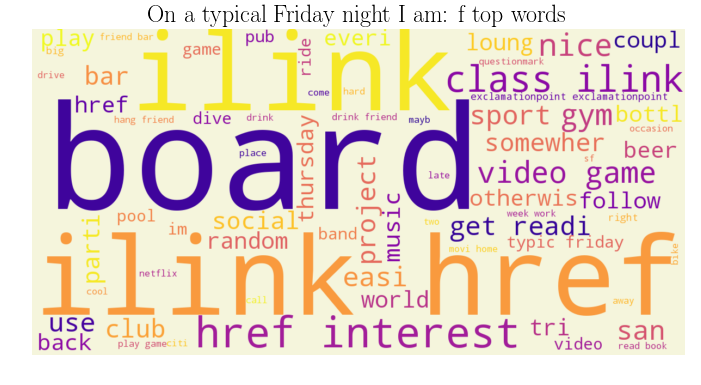

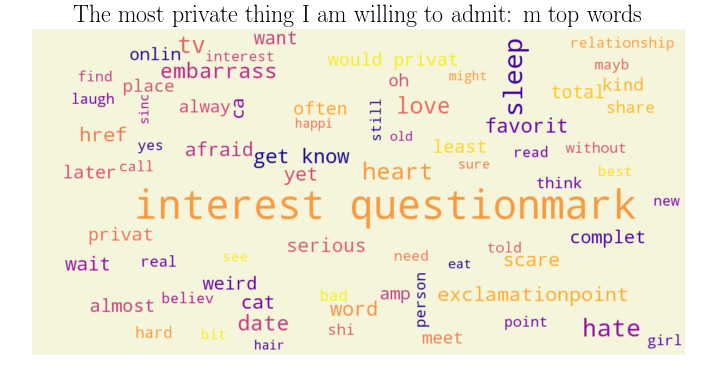

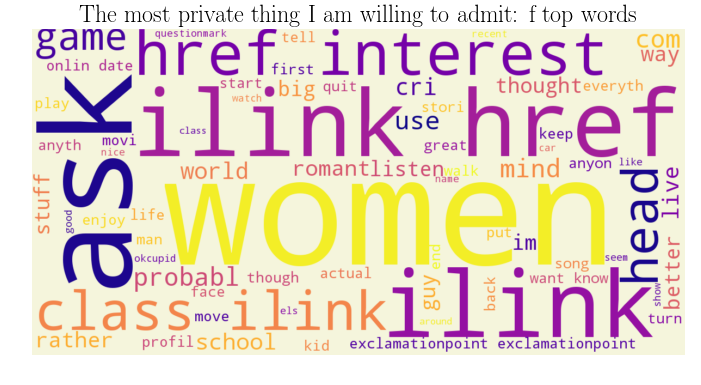

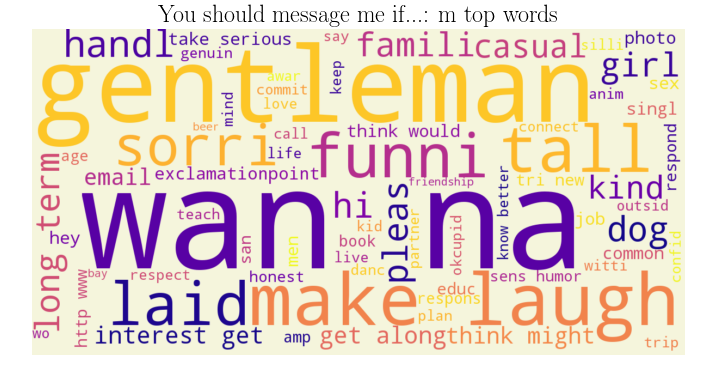

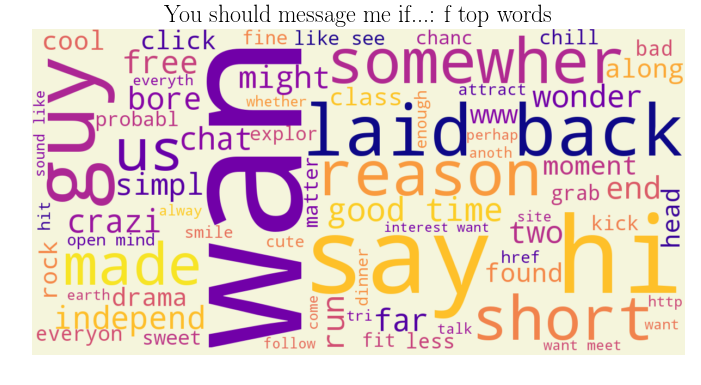

In [9]:
for essay in essay_objs:
    essay.make_wordcloud('gender', gender_prediction, Ntop_features=70, bg_color='beige', cmap="plasma", maxFont=None)

#### Testing multiclass predictions

In [10]:
# don't fit for best minDF for multiclass orientation prediction--hard to classify when most are in one category (straight) and much less in others (gay/bi)?
essay0.train_test_split(frac_training=0.8)
vectorizer = essay0.vectorizer_init(ngram_max=3, min_df=0.0005, max_df=0.9)
essay0.transformer_init()
train_tfidf, test_tfidf = essay0.bagWords_and_transform(vectorizer, showTime=True)
mdl, yScore = essay0.logRegression(religion_prediction, train_tfidf, test_tfidf)

NameError: name 'essay0' is not defined

In [ ]:
essay0.add_prediction('religion', mdl, vectorizer, train_tfidf, test_tfidf)
features_stem = vectorizer.get_feature_names()
zipped_coef_features = list( zip(mdl.coef_[cat_idx], features_stem),  )
zipped_coef_features.sort()